# PH 202: Assignment 1

### **Name: Suman Kumar Pal**

### **Integrated Ph.D. (1st year)**

### **SR No.: 24974**

GitHub link: https://github.com/suman122003/SKP_IISc/blob/main/PH_202_Statistical_Mechanics/asg1/codes_Suman.ipynb

**WHENEVER THERE ARE SOME INPUTS FOR USER, I HAVE USED  `   # INPUT` AFTER THAT LINE.**

## Modules to import

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

# Numerical Assignment

## Question 6

$$M_i = \left|i-\frac{Ns}{2}\right| + 5$$

- Arrays are created containing section numbers, time: `i_array` and `t_array`.
- Number of compartments are computed using given formula and the results are saved in an array: `M_array`.
- For each steps, the boxes are distributed. Number of boxes in compartments and compartments in section are saved in `Nb_array` (a 3d array). The total number of boxes in a section is saved  in `Nbt_array` (a 3d array).
- The plots are done.

In [3]:
Ns = 50         # INPUT
Nb = 10000      # INPUT
i_array = np.arange(1, Ns+1)
M_array = []
for i in i_array:
    M_array.append(np.abs(i-Ns/2)+5)
M_array = np.array(M_array)

Nt = 1050         # INPUT
Ms = int(np.sum(M_array))
t_array = np.arange(Nt)
Nb_array, Nbt_array = [], []
for ti in t_array:
    Nb_M = npr.multinomial(Nb, [1/Ms]*Ms)
    Nb_ti, Nbt_ti = [], []
    for i in i_array:
        Nb_M_ti = Nb_M[int(np.sum(M_array[:i-1])):int(np.sum(M_array[:i]))]
        Nb_ti.append(Nb_M_ti)
        Nbt_ti.append(np.sum(Nb_M_ti))
    Nb_array.append(Nb_ti)
    Nbt_array.append(Nbt_ti)
Nb_array = np.array(Nb_array)
Nbt_array = np.array(Nbt_array)

C:\Users\suman\AppData\Local\Temp\ipykernel_18376\2902489886.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Nb_array = np.array(Nb_array)


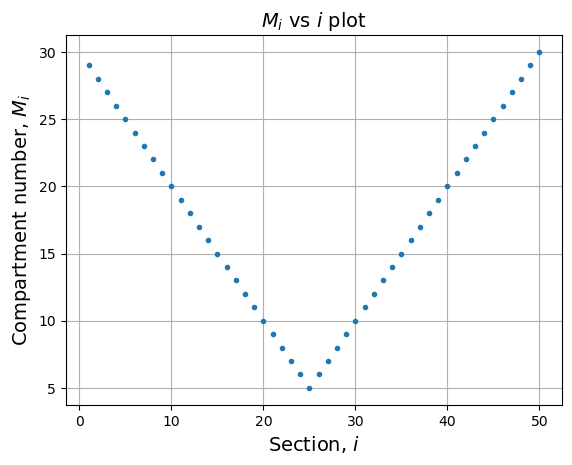

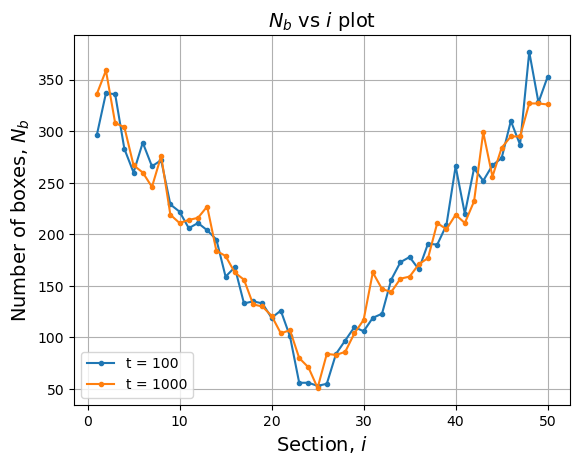

In [4]:
plt.plot(i_array, M_array, 'o', ms=3)
plt.title('$M_i$ vs $i$ plot', fontsize=14)
plt.xlabel('Section, $i$', fontsize=14)
plt.ylabel('Compartment number, $M_{i}$', fontsize=14)
plt.grid()
plt.savefig('Mi_vs_i.png', dpi=150)
plt.show()

for i in [100, 1000]:      # INPUT
    plt.plot(i_array, Nbt_array[i], 'o-', ms=3, label=f't = {t_array[i]}')
plt.xlabel('Section, $i$', fontsize=14)
plt.ylabel('Number of boxes, $N_{b}$', fontsize=14)
plt.title('$N_b$ vs $i$ plot', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.savefig('Nb_vs_i.png', dpi=150)
plt.show()

## Question 7

$$F = \sum_i \sigma_i$$

- First 100 iteration results are taken from the previous code: `Nb100` (containing all boxes distribution) and `t100`.
- For these distributions, mean and variance are calculated. $F$ is calculated using given formula. (`ni_array`, `sigi_array`, `F_array`)
- $F$ vs $t$ is plotted to show that, $F$ also doesn't have any certain dependence on $t$.
- To plot $F$ for different $N_b$, a function `fn_ni_sigi_avg(Nb)` is defined. This function gives average mean and standard deviation as output for 100 iterations.
- Using the above function, $F$ is calculated for different $N_b$ and the plots are shown.

In [5]:
Nb100 = Nb_array[:100]
t100 = t_array[:100]
ni_array = []
sigi_array = []
F_array = []
for ti in range(len(t100)):
    ni_ti = []
    sigi_ti = []
    for i in range(len(i_array)):
        ni_ti.append(np.mean(Nb100[ti][i]))
        sigi_ti.append((np.var(Nb100[ti][i]))**0.5)
    ni_array.append(ni_ti)
    sigi_array.append(sigi_ti)
    F_array.append(np.sum(sigi_ti))
ni_array = np.array(ni_array)
sigi_array = np.array(sigi_array)
F_array = np.array(F_array)

Text(0, 0.5, '$F$')

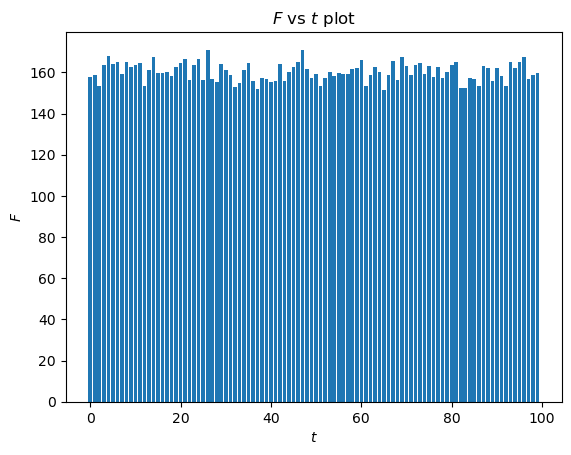

In [6]:
plt.bar(t100, F_array)
plt.title('$F$ vs $t$ plot')
plt.xlabel('$t$')
plt.ylabel('$F$')

This the variation of $F$ with time small.

A function to calculate mean ($n_i$) and standard deviation ($\sigma_i$):

In [7]:
Ns = 55         # INPUT
Nt = 100         # INPUT

def fn_ni_sigi(Nb):
    i_array = np.arange(1, Ns+1)
    M_array = []
    for i in i_array:
        M_array.append(np.abs(i-Ns/2)+5)
    M_array = np.array(M_array)

    Ms = int(np.sum(M_array))
    t_array = np.arange(Nt)
    Nb_array = []
    for ti in t_array:
        Nb_M = npr.multinomial(Nb, [1/Ms]*Ms)
        Nb_ti = []
        for i in i_array:
            Nb_M_ti = Nb_M[int(np.sum(M_array[:i-1])):int(np.sum(M_array[:i]))]
            Nb_ti.append(Nb_M_ti)
        Nb_array.append(Nb_ti)
    Nb_array = np.array(Nb_array)

    ni_array = []
    sigi_array = []
    F_array = []
    for ti in range(len(t_array)):
        ni_ti = []
        sigi_ti = []
        for i in range(len(i_array)):
            ni_ti.append(np.mean(Nb_array[ti][i]))
            sigi_ti.append((np.var(Nb_array[ti][i]))**0.5)
        ni_array.append(ni_ti)
        sigi_array.append(sigi_ti)
        F_array.append(np.sum(sigi_ti))
    return np.array(ni_array), np.array(sigi_array)

def fn_ni_sigi_avg(Nb):
    ni, sigi = fn_ni_sigi(Nb)
    ni_avg = np.mean(ni, axis=0)
    sigi_avg = np.mean(sigi, axis=0)
    return ni_avg, sigi_avg

Determination of $F$:

C:\Users\suman\AppData\Local\Temp\ipykernel_18376\3765360666.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Nb_array = np.array(Nb_array)


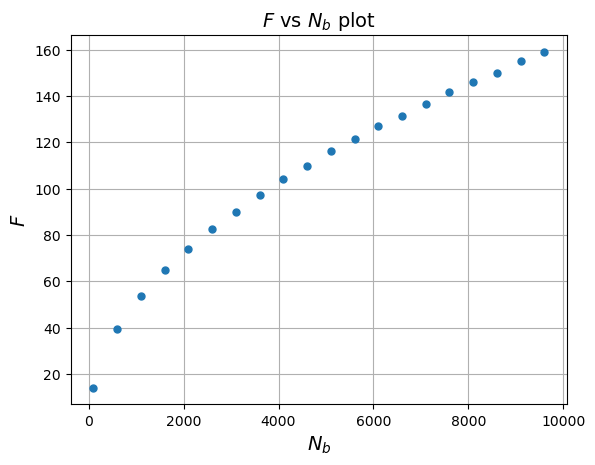

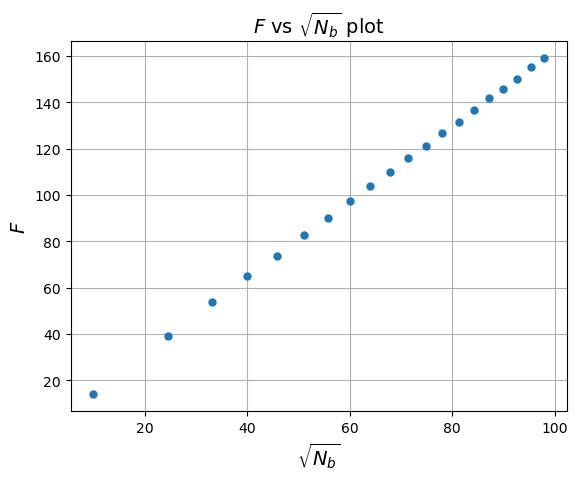

In [8]:
Nb_vals = np.arange(100, 10000, 500, dtype=int)
Fs = []
for Nbi in Nb_vals:
    nii, sigii = fn_ni_sigi_avg(Nbi)
    Fs.append(np.sum(sigii))
Fs = np.array(Fs)

plt.plot(Nb_vals, Fs, 'o', ms=5)
plt.title('$F$ vs $N_b$ plot', fontsize=14)
plt.xlabel('$N_b$', fontsize=14)
plt.ylabel('$F$', fontsize=14)
plt.grid()
plt.savefig('F_vs_Nb.png', dpi=150)
plt.show()

plt.plot(np.sqrt(Nb_vals), Fs, 'o', ms=5)
plt.title('$F$ vs $\sqrt{N_b}$ plot', fontsize=14)
plt.xlabel('$\sqrt{N_b}$', fontsize=14)
plt.ylabel('$F$', fontsize=14)
plt.grid()
plt.savefig('F_vs_rtNb.png', dpi=150)
plt.show()

## Question 8

$$F_2 = \sum_i \frac{\sigma_i}{n_i}$$

- From the defined function `fn_ni_sigi_avg(N_b)`, mean ($n_i$) and standard deviation ($\sigma_i$) are calculated and from that $F_2$ is calculated using the given formula.
- The plots are shown.

C:\Users\suman\AppData\Local\Temp\ipykernel_18376\3765360666.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Nb_array = np.array(Nb_array)


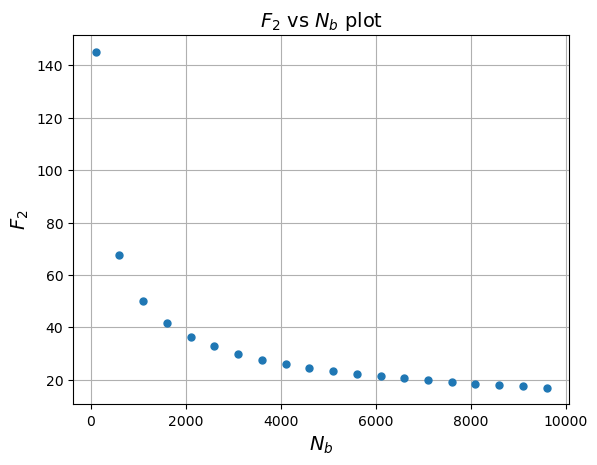

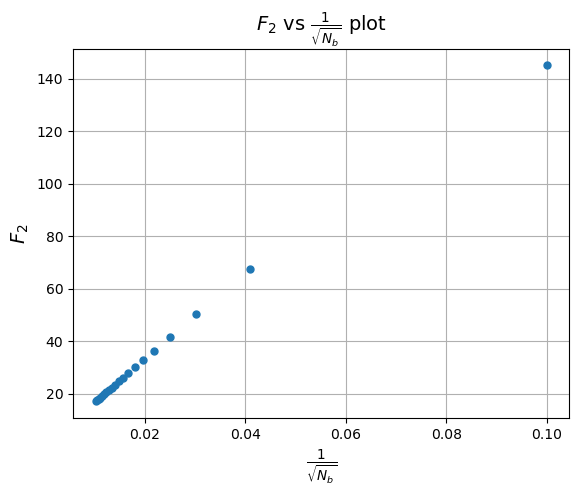

In [9]:
Nb_vals = np.arange(100, 10000, 500, dtype=int)
F2 = []
for Nbi in Nb_vals:
    nii, sigii = fn_ni_sigi_avg(Nbi)
    F2.append(np.sum(sigii/nii))
F2 = np.array(F2)

plt.plot(Nb_vals, F2, 'o', ms=5)
plt.title('$F_2$ vs $N_b$ plot', fontsize=14)
plt.xlabel('$N_b$', fontsize=14)
plt.ylabel('$F_2$', fontsize=14)
plt.grid()
plt.savefig('F2_vs_Nb.png', dpi=150)
plt.show()

plt.plot(1/np.sqrt(Nb_vals), F2, 'o', ms=5)
plt.title('$F_2$ vs $\\frac{1}{\sqrt{N_b}}$ plot' , fontsize=14)
plt.xlabel('$\\frac{1}{\sqrt{N_b}}$', fontsize=14)
plt.ylabel('$F_2$', fontsize=14)
plt.grid()
plt.savefig('F2_vs_rtinvNb.png', dpi=150)
plt.show()

## Conclusion

From the last plot, $F_2 = \sum_i \frac{\sigma_i}{n_i}$ is proportional to $\frac{1}{\sqrt{N_b}}$. From the plot in Question 7, $F = \sum_i \sigma_i$ is proportional to $\sqrt{N_b}$. Thus, $n_i$ is propotional to $N_b$. The obtained relations are, 
- $F \propto \sqrt{N_b}$
- $F_2 \propto \frac{1}{\sqrt{N_b}}$

The fitting is shown below,

Fitting parameters: [ 1.63611337 -1.07045153]


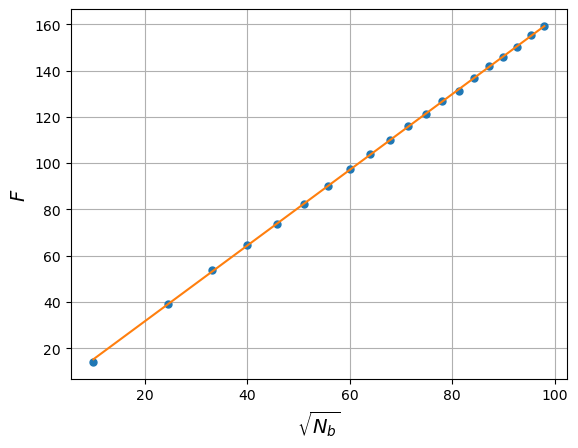

Fitting parameters: [1.65462015e+03 2.29590463e-01]


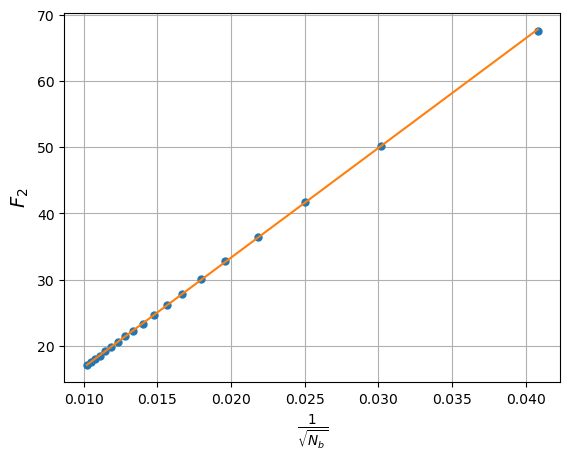

In [10]:
Fs = np.array(Fs)
F2a = np.array(F2)

linfn = lambda x, a, b: a*x + b

x1 = np.sqrt(Nb_vals)
plt.plot(x1, Fs, 'o', ms=5)
popt, pcov = curve_fit(linfn, x1, Fs, [2,-2.5])
print(f'Fitting parameters: {popt}')
y1 = linfn(x1, *popt)
plt.plot(x1, y1)
plt.xlabel('$\sqrt{N_b}$', fontsize=14)
plt.ylabel('$F$', fontsize=14)
plt.grid()
plt.show()

x2 = 1/np.sqrt(Nb_vals)
x2, F2a = x2[1:], F2a[1:]
plt.plot(x2, F2a, 'o', ms=5)
popt, pcov = curve_fit(linfn, x2, F2a, [2000,-1.5])
print(f'Fitting parameters: {popt}')
y2 = linfn(x2, *popt)
plt.plot(x2, y2)
plt.xlabel('$\\frac{1}{\sqrt{N_b}}$', fontsize=14)
plt.ylabel('$F_2$', fontsize=14)
plt.grid()
plt.show()

This shows, if $N_b$ is large, although the fluctuation $F$ increases, the quantity 'fluctuation per mean' (i.e. $F_2$) decreases. It's actually the *central limit theorem*. The mean increases as $N_b$ and the standard deviation increases as $\sqrt{N_b}$. So, the quantity 'standard deviation per mean' decreases as $\frac{1}{\sqrt{N_b}}$. Thus, in higher limit of $N_b$ the preciseness of determining a quantity increases. This shows the behaviour of a system at thermodynamic limit (where, $N$ has the order $10^{23}$, a very very large number).

**Low $N_b$ effect:** 

For lower number of the boxes, many of the compartments will not be filled. Even, for very low $N_b$, some sections may remain unfilled. This implies, for low number limit, many of the states remains unfilled. If we have $N_b=1$, only 1 compartment or 1 section is filled. And for this, the disorderness is 0. This corresponds to the 3rd law of thermodynamics: "at absolute zero, number of microstates is 1 and the absolute entropy (which is the measure of disorderness) is $S = k_B \ln{1} = 0$".